In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
import matplotlib.dates as mdates
from sqlalchemy import create_engine
from config import username, password

engine = create_engine('postgresql://{}:{}@localhost:5432/cali_renewable_db'.format(username,password))
con = engine.connect()

sql_prod = '''Select * From  "Production".hourlyrenewable'''

full_data = pd.read_sql(sql=sql_prod,con=con)
full_data.head()

timestamp        date  Hour  TOTAL  SOLAR TOTAL  SOLAR PV  \
0 2015-06-01 00:00:00  2015-06-01     1   4669            0         0   
1 2015-06-01 01:00:00  2015-06-01     2   4396            0         0   
2 2015-06-01 02:00:00  2015-06-01     3   4197            0         0   
3 2015-06-01 03:00:00  2015-06-01     4   4059            0         0   
4 2015-06-01 04:00:00  2015-06-01     5   3694            0         0   

   SOLAR THERMAL  WIND TOTAL  GEOTHERMAL  BIOMASS  BIOGAS  SMALL HYDRO  
0              0        2942        1038      321     209          159  
1              0        2708        1040      316     210          122  
2              0        2509        1039      319     209          121  
3              0        2372        1035      320     209          123  
4              0        1973        1035      317     208          161

In [2]:
full_data['date'] = pd.to_datetime(full_data['date'])

hour_grouped = full_data.groupby('Hour')
hour_sum = pd.DataFrame(hour_grouped['TOTAL'].mean())
#hour_sum['Solar'] = hour_sum['SOLAR']

hour_sum['Wind Total'] = hour_grouped['WIND TOTAL'].mean()
hour_sum['Biogas'] = hour_grouped['BIOGAS'].mean()
hour_sum['Geothermal'] = hour_grouped['GEOTHERMAL'].mean()
hour_sum['Solar PV'] = hour_grouped['SOLAR PV'].mean()
hour_sum['Solar Total'] = hour_grouped['SOLAR TOTAL'].mean()
hour_sum['Solar Thermal'] = hour_grouped['SOLAR THERMAL'].mean()
hour_sum['Small Hydro'] = hour_grouped['SMALL HYDRO'].mean()
hour_sum['Biomass'] = hour_grouped['BIOMASS'].mean()



display(full_data.head())
display(hour_sum.head())
print(full_data.info())

timestamp       date  Hour  TOTAL  SOLAR TOTAL  SOLAR PV  \
0 2015-06-01 00:00:00 2015-06-01     1   4669            0         0   
1 2015-06-01 01:00:00 2015-06-01     2   4396            0         0   
2 2015-06-01 02:00:00 2015-06-01     3   4197            0         0   
3 2015-06-01 03:00:00 2015-06-01     4   4059            0         0   
4 2015-06-01 04:00:00 2015-06-01     5   3694            0         0   

   SOLAR THERMAL  WIND TOTAL  GEOTHERMAL  BIOMASS  BIOGAS  SMALL HYDRO  
0              0        2942        1038      321     209          159  
1              0        2708        1040      316     210          122  
2              0        2509        1039      319     209          121  
3              0        2372        1035      320     209          123  
4              0        1973        1035      317     208          161

TOTAL   Wind Total      Biogas  Geothermal  Solar PV  Solar Total  \
Hour                                                                            
1     3784.818868  2024.620126  202.296855  968.352201  0.315094     0.416352   
2     3796.594340  2045.455975  202.696226  968.931447  0.301887     0.384906   
3     3716.561635  1970.933333  202.841509  968.883019  0.290566     0.306289   
4     3629.503145  1884.587421  202.876101  968.780503  0.228931     0.230818   
5     3536.336478  1782.155346  202.718239  968.132704  0.269182     0.276730   

      Solar Thermal  Small Hydro     Biomass  
Hour                                          
1          0.101258   311.438365  277.694969  
2          0.083019   302.171698  276.954088  
3          0.015723   295.782390  277.815094  
4          0.001887   294.432704  278.595597  
5          0.007547   303.238365  279.815094

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38160 entries, 0 to 38159
Data columns (total 12 columns):
timestamp        38160 non-null datetime64[ns]
date             38160 non-null datetime64[ns]
Hour             38160 non-null int64
TOTAL            38160 non-null int64
SOLAR TOTAL      38160 non-null int64
SOLAR PV         38160 non-null int64
SOLAR THERMAL    38160 non-null int64
WIND TOTAL       38160 non-null int64
GEOTHERMAL       38160 non-null int64
BIOMASS          38160 non-null int64
BIOGAS           38160 non-null int64
SMALL HYDRO      38160 non-null int64
dtypes: datetime64[ns](2), int64(10)
memory usage: 3.5 MB
None


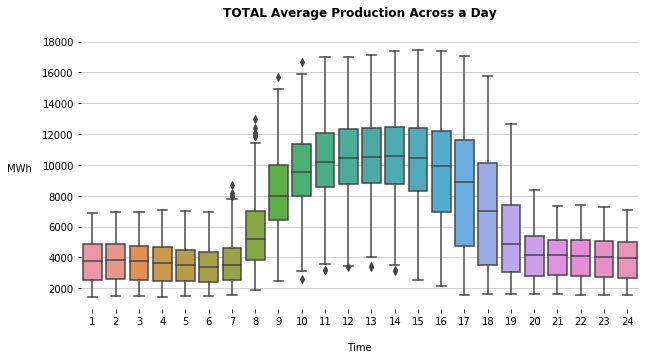

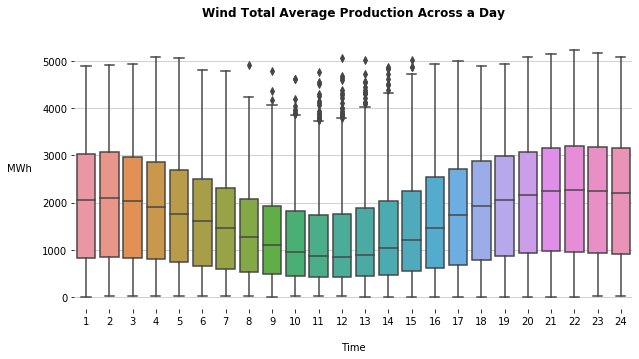

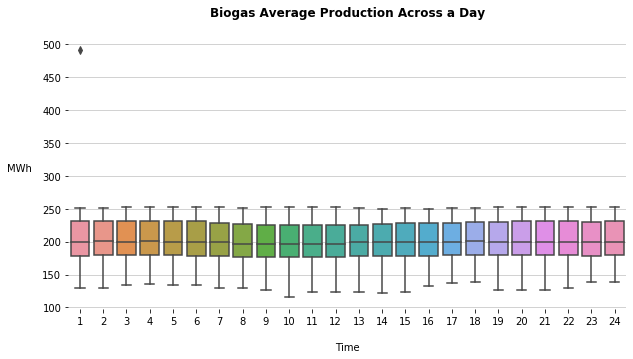

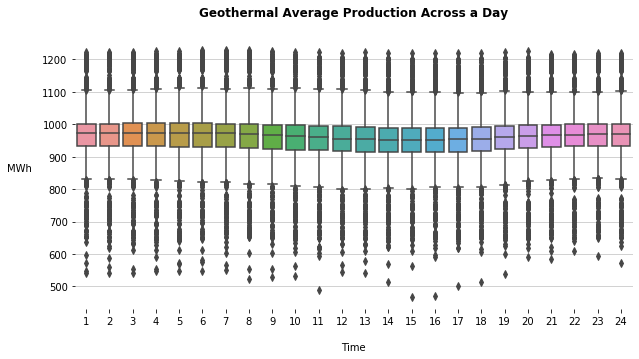

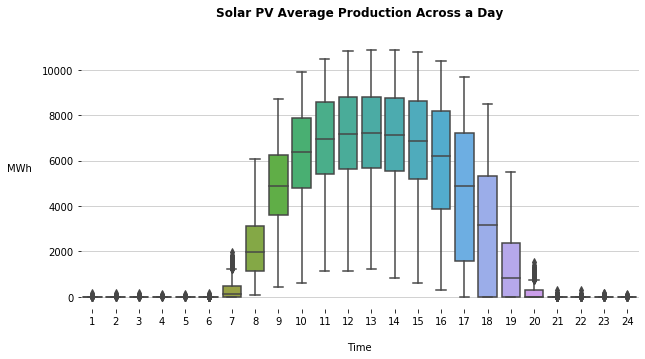

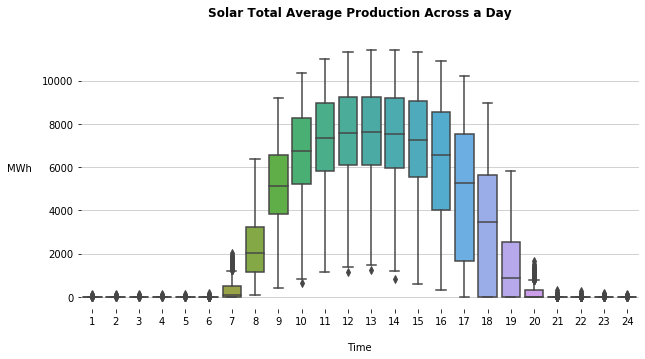

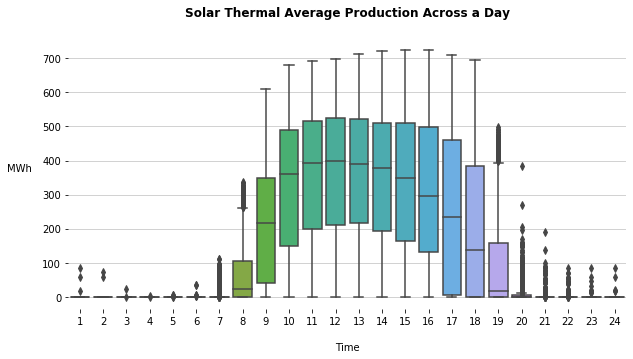

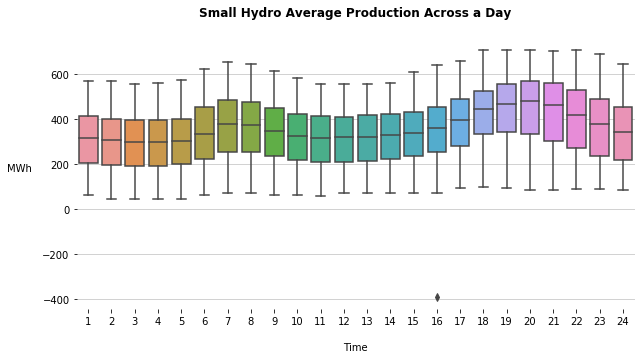

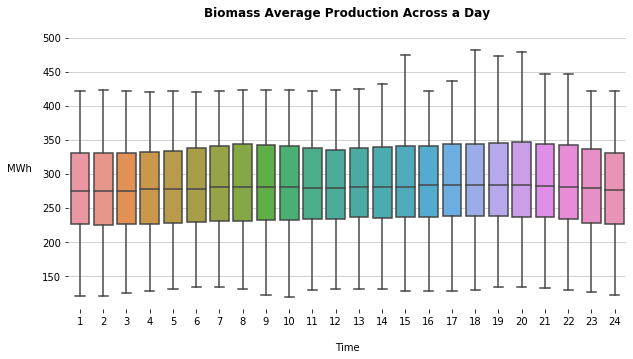

In [3]:
for i in range(len(hour_sum.columns)):
    plt.figure(figsize=(10,5))
    sns.boxplot(full_data['Hour'],full_data[hour_sum.columns[i].upper()])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().set_axisbelow(True)
    plt.gca().grid(axis='y',alpha=.7)

    plt.title('{} Average Production Across a Day\n'.format(hour_sum.columns[i]),fontweight='bold')

    plt.xlabel('\nTime')

    plt.ylabel("MWh  ",rotation='0',ha='right')
    
    plt.show()

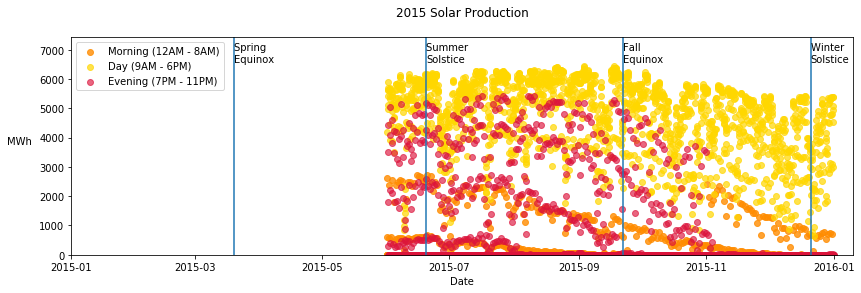

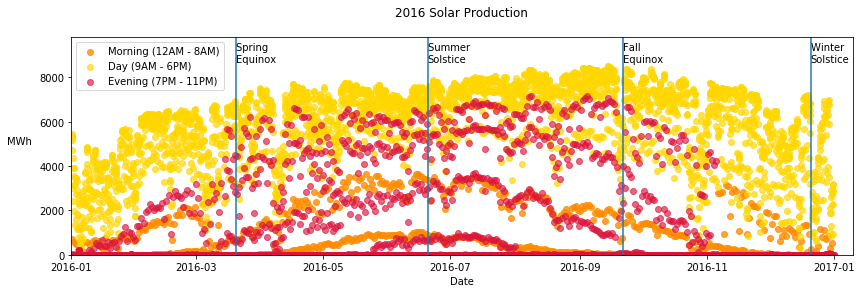

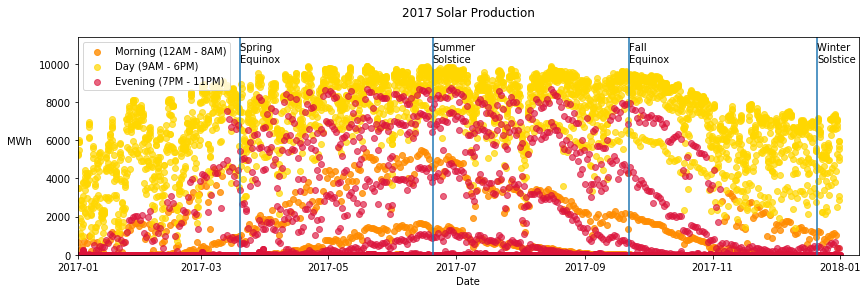

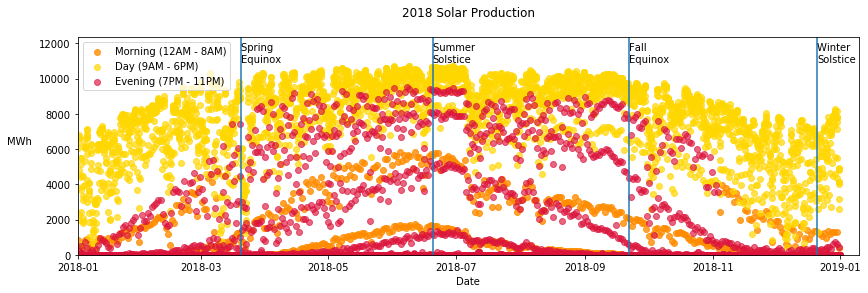

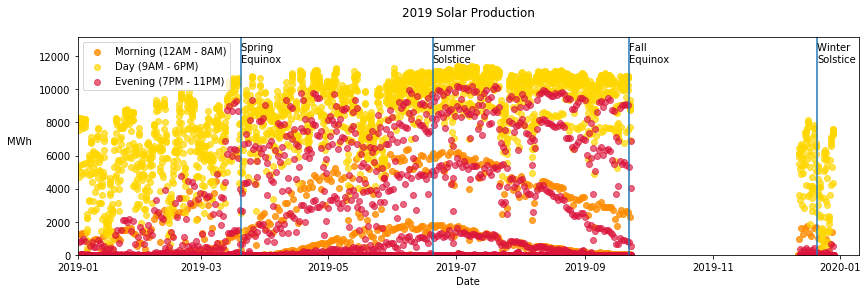

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

full_data['YEAR'] = full_data['date'].dt.year

for year in range(2015,2020):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    x = data['timestamp']
    y = data['SOLAR TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='#FF8C00',alpha=.8,label='Morning (12AM - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='#FFD700',alpha=.7,label='Day (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='#DC143C',alpha=.65,label='Evening (7PM - 11PM)')
    plt.ylim(0,y.max()*1.15)
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Solar Production\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.show()

<Figure size 1008x288 with 0 Axes>

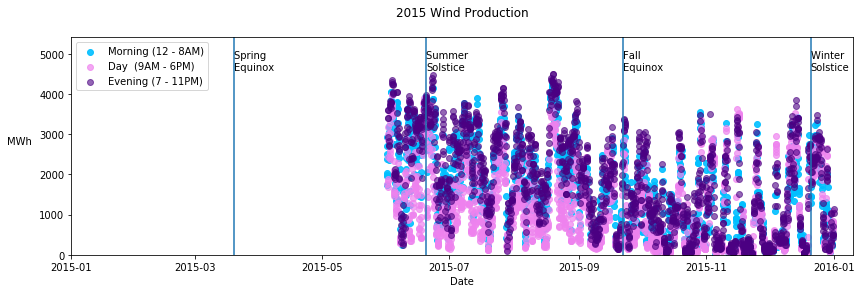

<Figure size 1008x288 with 0 Axes>

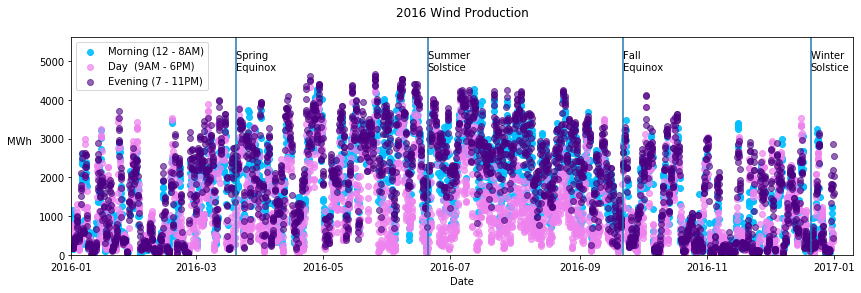

<Figure size 1008x288 with 0 Axes>

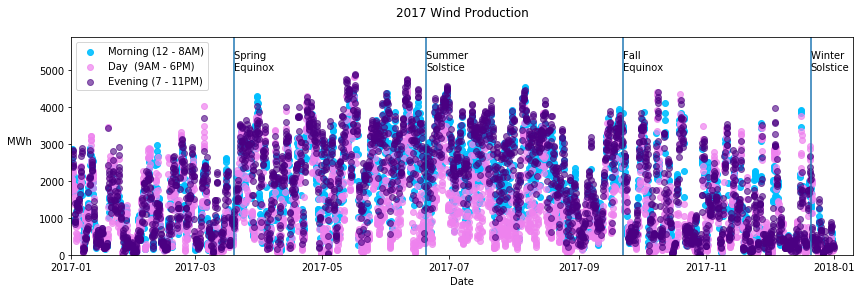

<Figure size 1008x288 with 0 Axes>

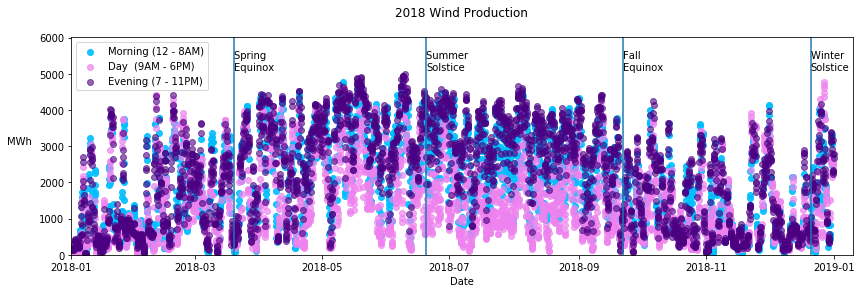

<Figure size 1008x288 with 0 Axes>

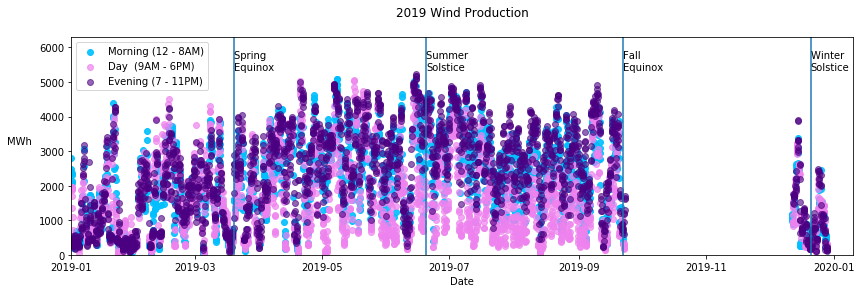

In [5]:
for year in range(2015,2020):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    mask_mid = ((hour >10)&(hour<16))
    masks = [mask_morning, mask_mid, mask_evening]
    plt.figure(figsize=(14,4))
    x = data['timestamp']
    y = data['WIND TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='#00BFFF',alpha=.9,label='Morning (12 - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='#EE82EE',alpha=.7,label='Day  (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='#4B0082',alpha=.6,label='Evening (7 - 11PM)') 
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylim(0,y.max()*1.2)
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Wind Production\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.show()

<Figure size 1008x288 with 0 Axes>

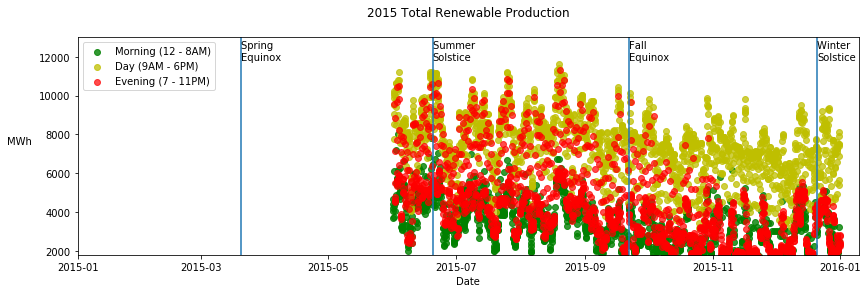

<Figure size 1008x288 with 0 Axes>

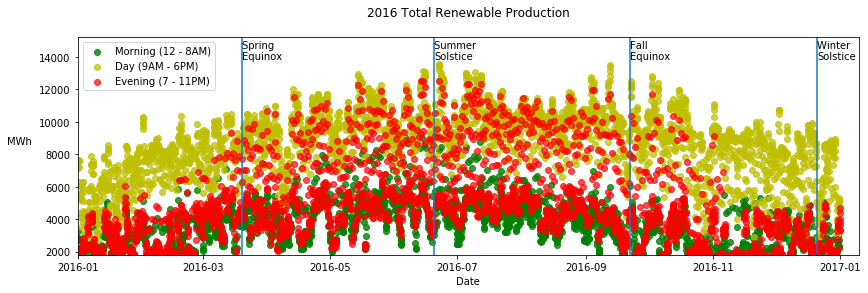

<Figure size 1008x288 with 0 Axes>

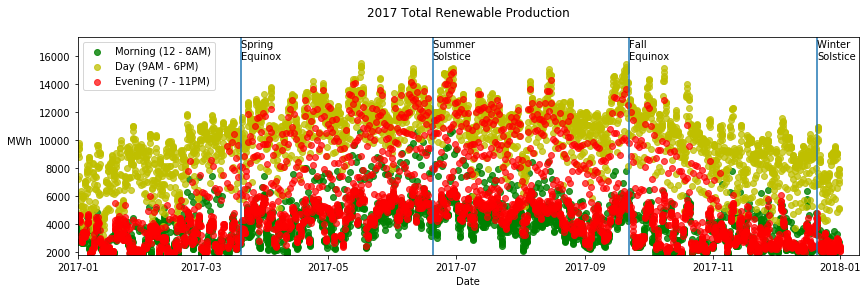

<Figure size 1008x288 with 0 Axes>

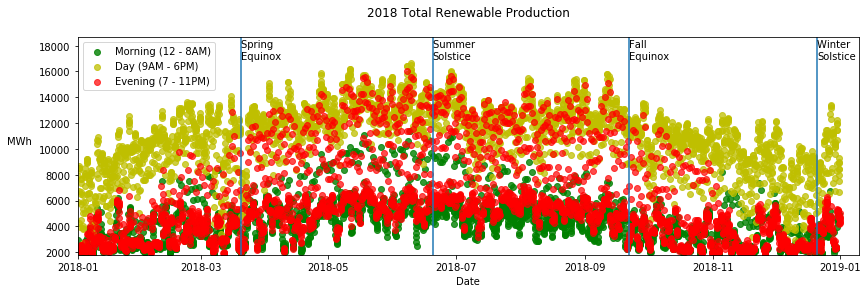

<Figure size 1008x288 with 0 Axes>

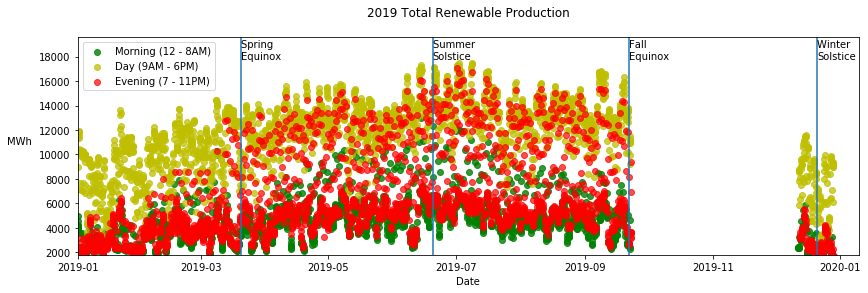

In [6]:
for year in range(2015,2020):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    mask_mid = ((hour >10)&(hour<16))
    plt.figure(figsize=(14,4))
    x = data['timestamp']
    y = data['TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='g',alpha=.8,label='Morning (12 - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='y',alpha=.75,label='Day (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='r',alpha=.7,label='Evening (7 - 11PM)')
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylim(1800,y.max()*1.12)
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Total Renewable Production\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.show()

TOTAL          50043.375
smalls         12861.870
SOLAR TOTAL    23372.737
WIND TOTAL     13808.768
Name: 2019, dtype: float64

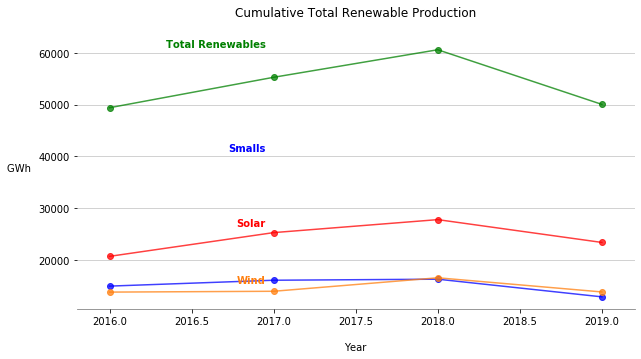

In [7]:
full_data['smalls'] = full_data['TOTAL'] - full_data['SOLAR TOTAL'] - full_data['WIND TOTAL']


grouped = full_data.groupby('YEAR')
grouped_df = pd.DataFrame(grouped['TOTAL'].sum())
grouped_df.drop(index=[2015],inplace=True)
grouped_df['TOTAL'] = grouped_df['TOTAL']/1000
grouped_df['smalls'] = grouped['smalls'].sum()
grouped_df['smalls'] = grouped_df['smalls']/1000
grouped_df['SOLAR TOTAL'] = grouped['SOLAR TOTAL'].sum()
grouped_df['SOLAR TOTAL'] = grouped_df['SOLAR TOTAL']/1000
grouped_df['WIND TOTAL'] = grouped['WIND TOTAL'].sum()
grouped_df['WIND TOTAL'] = grouped_df['WIND TOTAL']/1000

fig, ax = plt.subplots()

plt.plot(grouped_df.index,grouped_df['TOTAL'],color='g',marker='o',alpha=.75,label='Totoal Renewables')
plt.plot(grouped_df.index, grouped_df['smalls'], color='b',marker='o',alpha=.75,label='Smalls')
plt.plot(grouped_df.index, grouped_df['SOLAR TOTAL'], color='r',marker='o',alpha=.75,label='Solar')
plt.plot(grouped_df.index, grouped_df['WIND TOTAL'], color='C1',marker='o',alpha=.75,label='Wind')

fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('GWh ',rotation='0',ha='right')
plt.xlim(2015.8,2019.2)
plt.xlabel('\nYear')
plt.title('Cumulative Total Renewable Production\n')

ax.annotate('Total Renewables',(2016.95,61000),ha='right',color='g',weight='bold',clip_on=True)
ax.annotate('Smalls',(2016.95,41000),ha='right',color='b',weight='bold',clip_on=True)
ax.annotate('Solar',(2016.95,26500),ha='right',color='r',weight='bold',clip_on=True)
ax.annotate('Wind',(2016.95,15500),ha='right',color='C1',weight='bold',clip_on=True)


display(grouped_df.loc[2019,:])


In [46]:
import matplotlib.dates as mdates

months = mdates.MonthLocator()

test = full_data.loc[:,['timestamp','TOTAL']]
test1 = test.set_index(pd.DatetimeIndex(test['timestamp']))
test1.drop(columns=['timestamp'],inplace=True)
season = test1.rolling(window=30*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).mean()
q25 = test1.rolling(window=30*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.25)
q75 = test1.rolling(window=30*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.75)

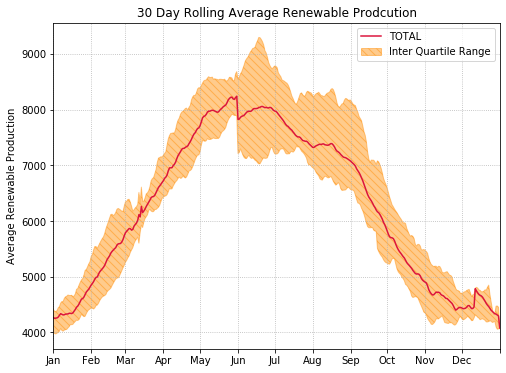

In [47]:
f, ax = plt.subplots(figsize=(8,6))

ax.fill_between(season.index,q25.values.ravel(),q75.values.ravel(),color='#FF8C00',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range')
season.plot(ax=ax, color='#DC143C')
month_list = pd.date_range('06/01/2015','09/22/2019 23:00:00',freq='24H')
ax.set_xlabel('Day Of Year')
ax.set_ylabel('Average Renewable Production')
ax.set_title('30 Day Rolling Average Renewable Prodcution')

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
ax.set_xlabel('')
ax.xaxis.set_major_locator(months)
ax.set_xticklabels(month_names)
ax.grid(ls=':')

plt.legend()

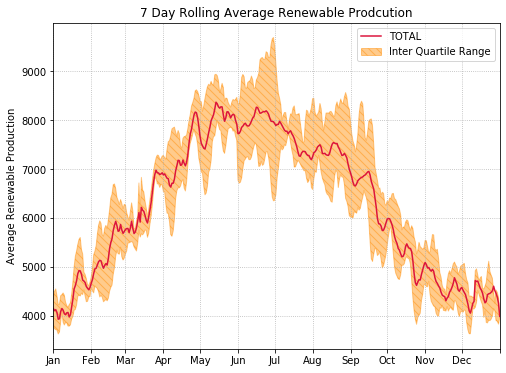

In [48]:
test = full_data.loc[:,['timestamp','TOTAL']]
test1 = test.set_index(pd.DatetimeIndex(test['timestamp']))
test1.drop(columns=['timestamp'],inplace=True)
season = test1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).mean()
q25 = test1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.25)
q75 = test1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.75)

f, ax = plt.subplots(figsize=(8,6))

ax.fill_between(season.index,q25.values.ravel(),q75.values.ravel(),color='#FF8C00',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range')
season.plot(ax=ax, color='#DC143C')
month_list = pd.date_range('06/01/2015','09/22/2019 23:00:00',freq='24H')
ax.set_xlabel('Day Of Year')
ax.set_ylabel('Average Renewable Production')
ax.set_title('7 Day Rolling Average Renewable Prodcution')

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
ax.set_xlabel('')
ax.xaxis.set_major_locator(months)
ax.set_xticklabels(month_names)
ax.grid(ls=':')

plt.legend()

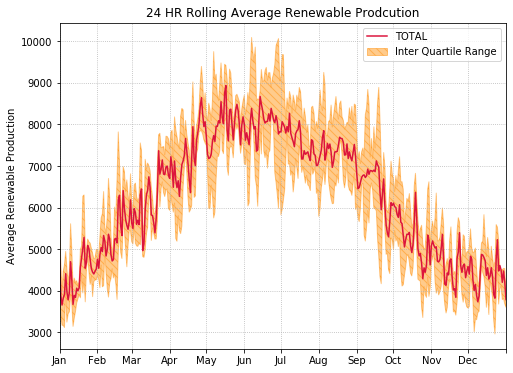

In [11]:
test = full_data.loc[:,['timestamp','TOTAL']]
test1 = test.set_index(pd.DatetimeIndex(test['timestamp']))
test1.drop(columns=['timestamp'],inplace=True)
season = test1.rolling(window=24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).mean()
q25 = test1.rolling(window=24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.25)
q75 = test1.rolling(window=24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.75)

f, ax = plt.subplots(figsize=(8,6))

ax.fill_between(season.index,q25.values.ravel(),q75.values.ravel(),color='#FF8C00',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range')
season.plot(ax=ax, color='#DC143C')
month_list = pd.date_range('06/01/2015','09/22/2019 23:00:00',freq='24H')
ax.set_xlabel('Day Of Year')
ax.set_ylabel('Average Renewable Production')
ax.set_title('24 HR Rolling Average Renewable Prodcution')
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
ax.set_xlabel('')
ax.xaxis.set_major_locator(months)
ax.set_xticklabels(month_names)
ax.grid(ls=':')
plt.legend()

In [57]:
hour = test1.copy()
hour['month'] = hour.index.month
hour['hour'] = hour.index.hour

In [58]:
hour = hour.groupby(['month','hour']).mean().unstack()
hour.columns = hour.columns.droplevel(0)
hour.head()

hour            0            1            2            3            4   \
month                                                                    
1      2668.193548  2722.548387  2679.596774  2668.846774  2679.056452   
2      3093.955752  3137.725664  3088.442478  3048.743363  2990.141593   
3      3567.975410  3588.286885  3509.450820  3499.024590  3431.385246   
4      4172.666667  4205.400000  4142.475000  4077.575000  4000.491667   
5      4798.951613  4803.000000  4707.000000  4589.241935  4430.741935   

hour            5            6            7             8             9   ...  \
month                                                                     ...   
1      2684.467742  2719.846774  3484.701613   5789.548387   7342.959677  ...   
2      2984.123894  3087.973451  4855.849558   7722.407080   9153.831858  ...   
3      3373.647541  3462.918033  4961.147541   7930.000000   9756.393443  ...   
4      3906.408333  4061.125000  6317.250000   9313.158333  10819.433333  ...   
5      4301.540323  5110.290323  7997.000000  10358.500000  11413.685484  ...   

hour             14            15            16            17           18  \
month                                                                        
1       7419.604839   5957.846774   3595.145161   2873.346774  2889.467742   
2       9282.451327   8230.982301   5656.601770   3412.283186  3330.725664   
3      10476.967213  10004.885246   8723.803279   6478.057377  4481.893443   
4      11923.233333  11588.316667  10928.733333   9349.333333  6257.250000   
5      12346.516129  12178.443548  11645.040323  10470.935484  7756.758065   

hour            19           20           21           22           23  
month                                                                   
1      2884.903226  2856.225806  2811.846774  2757.250000  2741.645161  
2      3342.353982  3326.504425  3273.451327  3256.336283  3209.300885  
3      3908.795082  3917.745902  3880.844262  3800.008197  3753.770492  
4      4530.458333  4484.075000  4470.600000  4392.283333  4352.383333  
5      5298.193548  5053.580645  5083.524194  5036.935484  4995.088710  

[5 rows x 24 columns]

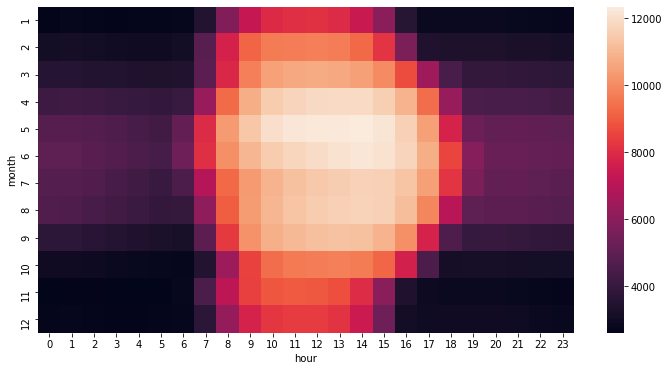

In [59]:
f, ax = plt.subplots(figsize=(12,6))
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul']
sns.heatmap(hour, ax=ax)

In [60]:
from mpl_toolkits.mplot3d import Axes3D 
test = full_data.loc[:,['timestamp','TOTAL']]
test1 = test.set_index(pd.DatetimeIndex(test['timestamp']))

In [61]:
hour = test1.copy()
# hour.set_index(pd.DatetimeIndex(hour['timestamp']), inplace=True)
display(hour.head())
hour['month'] = hour.index.month
hour['hour'] = hour.index.hour

timestamp  TOTAL
timestamp                                     
2015-06-01 00:00:00 2015-06-01 00:00:00   4669
2015-06-01 01:00:00 2015-06-01 01:00:00   4396
2015-06-01 02:00:00 2015-06-01 02:00:00   4197
2015-06-01 03:00:00 2015-06-01 03:00:00   4059
2015-06-01 04:00:00 2015-06-01 04:00:00   3694

In [62]:
hour = hour.groupby(['month','hour']).mean().unstack()
hour.columns = hour.columns.droplevel(0)

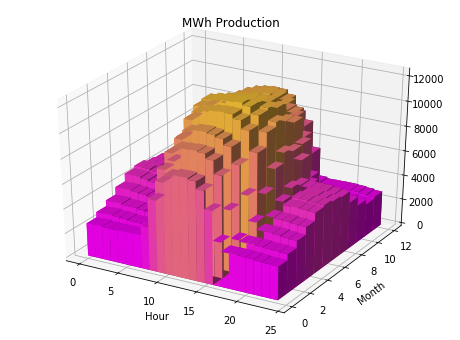

In [69]:
import matplotlib.cm as cm


hours = []
month_ = []
mwh = []
for i in range(12):
    for j in range(24):
        month_.append(i)
        hours.append(j)
        mwh.append(hour.iloc[i,j])


fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(projection='3d')
x = hours
y = month_
z = mwh
bottom=np.zeros_like(x)

cmap= cm.get_cmap('spring')
max_height = np.max(z)
min_height = np.min(z)


rgba = [cmap((k-min_height)/max_height) for k in z]
plt.xlabel("Hour")
plt.ylabel("Month")
plt.title('MWh Production')
ax1.bar3d(x,y,bottom,1,1,z,shade=True,color=rgba)

### Demand Data

In [15]:
sql_demand = 'Select * From "Demand".hourlydemand'
demand_data = pd.read_sql(sql=sql_demand, con=con)

demand_data['date'] = pd.to_datetime(demand_data['date'])
demand_data['YEAR'] = demand_data['date'].dt.year

demand_data.head()  

timestamp       date  Hour   DEMAND  YEAR
0 2019-12-29 11:00:00 2019-12-29    11  21305.0  2019
1 2019-12-29 10:00:00 2019-12-29    10  21638.0  2019
2 2019-12-29 09:00:00 2019-12-29     9  21745.0  2019
3 2019-12-29 08:00:00 2019-12-29     8  21859.0  2019
4 2019-12-29 07:00:00 2019-12-29     7  21586.0  2019

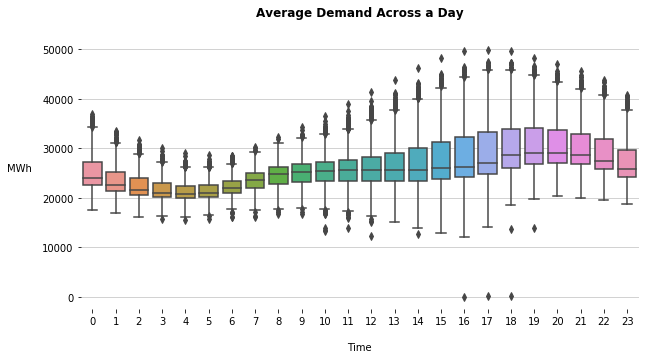

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(demand_data['Hour'],demand_data['DEMAND'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.gca().grid(axis='y',alpha=.7)

plt.title('Average Demand Across a Day\n',fontweight='bold')

plt.xlabel('\nTime')

plt.ylabel("MWh  ",rotation='0',ha='right')

plt.show()

<Figure size 1008x288 with 0 Axes>

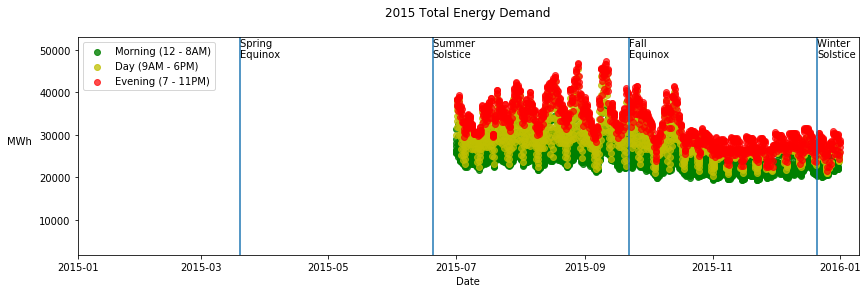

<Figure size 1008x288 with 0 Axes>

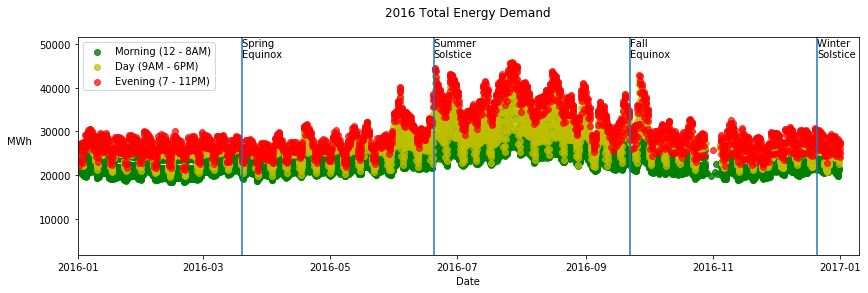

<Figure size 1008x288 with 0 Axes>

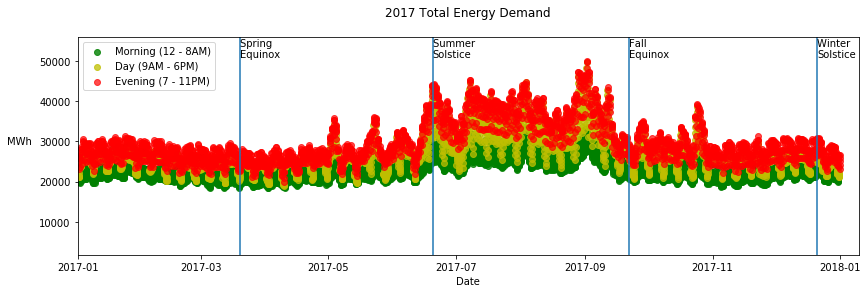

<Figure size 1008x288 with 0 Axes>

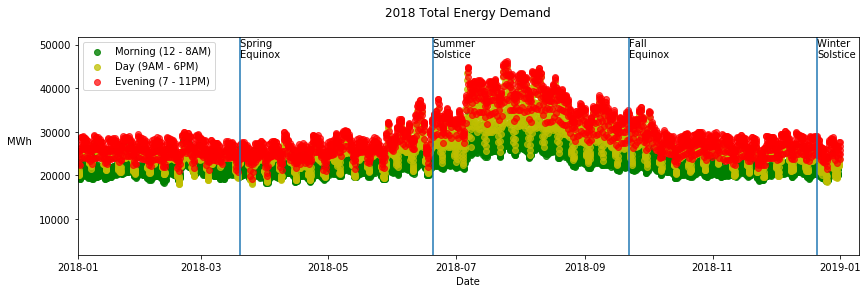

<Figure size 1008x288 with 0 Axes>

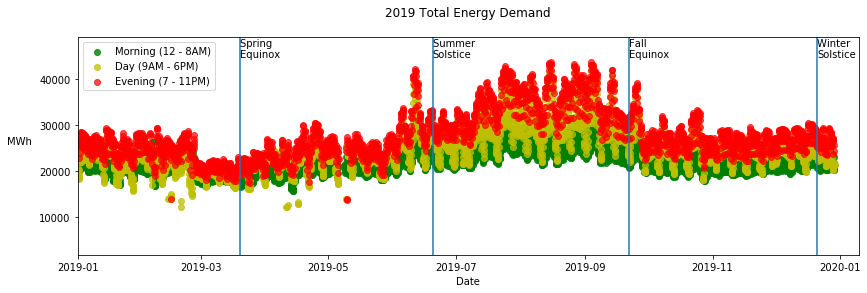

In [17]:
for year in range(2015,2020):
    data = demand_data.loc[demand_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    mask_mid = ((hour >10)&(hour<16))
    plt.figure(figsize=(14,4))
    x = data['timestamp']
    y = data['DEMAND']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='g',alpha=.8,label='Morning (12 - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='y',alpha=.75,label='Day (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='r',alpha=.7,label='Evening (7 - 11PM)')
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylim(1800,y.max()*1.12)
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Total Energy Demand\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.show()

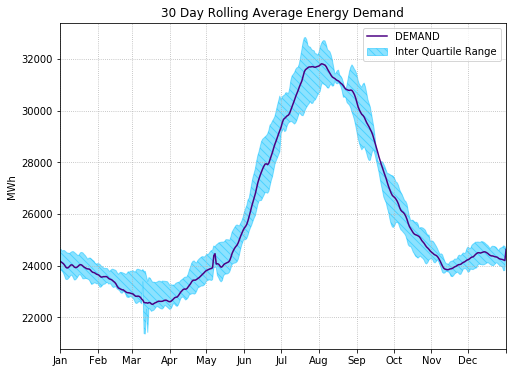

In [18]:
testd = demand_data.loc[:,['timestamp','DEMAND']]
testd1 = testd.set_index(pd.DatetimeIndex(testd['timestamp']))
testd1.drop(columns=['timestamp'],inplace=True)
seasond = testd1.rolling(window=30*24, center=True, min_periods=20).mean().groupby(testd1.index.dayofyear).mean()
q25d = testd1.rolling(window=30*24, center=True, min_periods=20).mean().groupby(testd1.index.dayofyear).quantile(.25)
q75d = testd1.rolling(window=30*24, center=True, min_periods=20).mean().groupby(testd1.index.dayofyear).quantile(.75)

f, ax = plt.subplots(figsize=(8,6))

ax.fill_between(seasond.index,q25d.values.ravel(),q75d.values.ravel(),color='#00BFFF',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range')
seasond.plot(ax=ax, color='#4B0082')


ax.set_xlabel('Day Of Year')
ax.set_ylabel('MWh')
ax.set_title('30 Day Rolling Average Energy Demand')
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
ax.set_xlabel('')
ax.xaxis.set_major_locator(months)
ax.set_xticklabels(month_names)
ax.grid(ls=':')
plt.legend()

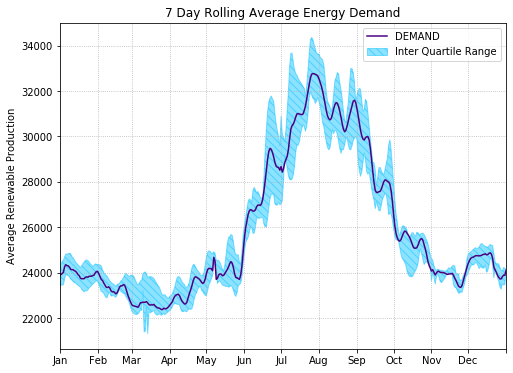

In [19]:
test = demand_data.loc[:,['timestamp','DEMAND']]
test1 = test.set_index(pd.DatetimeIndex(test['timestamp']))
test1.drop(columns=['timestamp'],inplace=True)
season = test1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).mean()
q25 = test1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.25)
q75 = test1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.75)

f, ax = plt.subplots(figsize=(8,6))

ax.fill_between(season.index,q25.values.ravel(),q75.values.ravel(),color='#00BFFF',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range')
season.plot(ax=ax, color='#4B0082')
month_list = pd.date_range('06/01/2015','09/22/2019 23:00:00',freq='24H')
ax.set_xlabel('Day Of Year')
ax.set_ylabel('Average Renewable Production')
ax.set_title('7 Day Rolling Average Energy Demand')

month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
ax.set_xlabel('')
ax.xaxis.set_major_locator(months)
ax.set_xticklabels(month_names)
ax.grid(ls=':')

plt.legend()

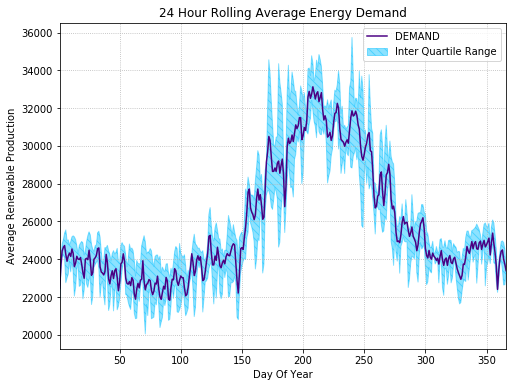

In [20]:
test = demand_data.loc[:,['timestamp','DEMAND']]
test1 = test.set_index(pd.DatetimeIndex(test['timestamp']))
test1.drop(columns=['timestamp'],inplace=True)
season = test1.rolling(window=24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).mean()
q25 = test1.rolling(window=24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.25)
q75 = test1.rolling(window=24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.75)

f, ax = plt.subplots(figsize=(8,6))

ax.fill_between(season.index,q25.values.ravel(),q75.values.ravel(),color='#00BFFF',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range')
season.plot(ax=ax, color='#4B0082')
month_list = pd.date_range('06/01/2015','09/22/2019 23:00:00',freq='24H')
ax.set_xlabel('Day Of Year')
ax.set_ylabel('Average Renewable Production')
ax.set_title('24 Hour Rolling Average Energy Demand')
ax.grid(ls=':')
plt.legend()

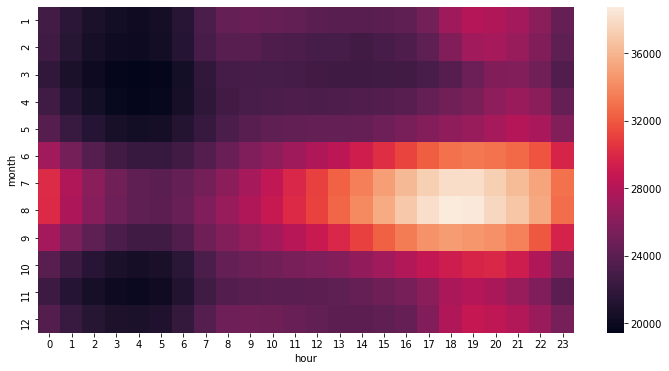

In [21]:
hour = test1.copy()
hour['month'] = hour.index.month
hour['hour'] = hour.index.hour

hour = hour.groupby(['month','hour']).mean().unstack()
hour.columns = hour.columns.droplevel(0)

f, ax = plt.subplots(figsize=(12,6))
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul']
sns.heatmap(hour, ax=ax)

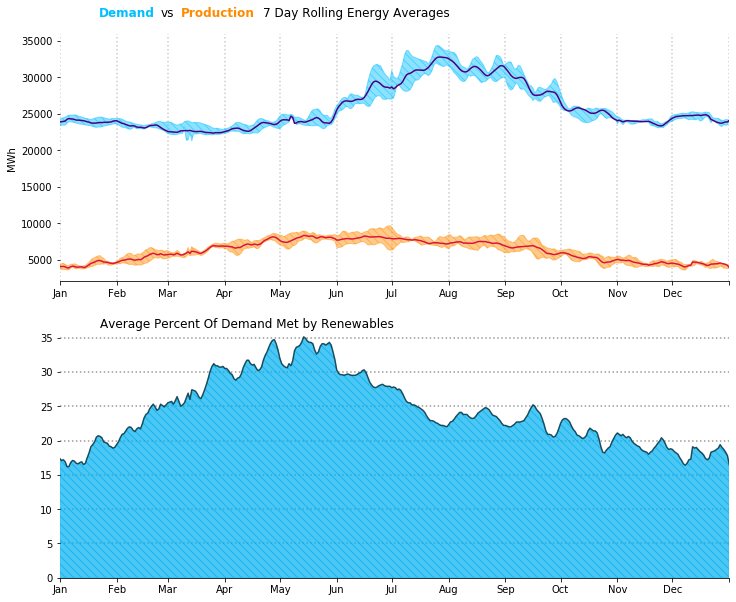

In [22]:

months = mdates.MonthLocator()

testd = demand_data.loc[:,['timestamp','DEMAND']]
testd1 = testd.set_index(pd.DatetimeIndex(testd['timestamp']))
testd1.drop(columns=['timestamp'],inplace=True)
seasond = testd1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(testd1.index.dayofyear).mean()
q25d = testd1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(testd1.index.dayofyear).quantile(.25)
q75d = testd1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(testd1.index.dayofyear).quantile(.75)

f, axes = plt.subplots(nrows=2, figsize=(12,10), sharey=False)
ax = axes[0]
ax.fill_between(seasond.index,q25d.values.ravel(),q75d.values.ravel(),color='#00BFFF',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range (Demand)')
seasond.plot(ax=ax, color='#4B0082')

test = full_data.loc[:,['timestamp','TOTAL']]
test1 = test.set_index(pd.DatetimeIndex(test['timestamp']))
test1.drop(columns=['timestamp'],inplace=True)
season = test1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).mean()
q25 = test1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.25)
q75 = test1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.75)

ax.fill_between(season.index,q25.values.ravel(),q75.values.ravel(),color='#FF8C00',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range (Production)')
season.plot(ax=ax, color='#DC143C')



month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
ax.set_xlabel('')
ax.xaxis.set_major_locator(months)
ax.set_xticklabels(month_names)
ax.set_ylabel('MWh')


for i in ax.get_xticks():
#    ax.annotate('{}%'.format(p),(i,10000),ha='left',color='k',clip_on=True)
    ax.axvline(i, ls=':',color='0.8',zorder=-1)

    
    
plt.figtext(0.17, 0.9, "Demand", ha="left", va="bottom", size="large",color='#00BFFF', weight='bold')
plt.figtext(0.242, 0.9, "vs", ha="left", va="bottom", size="large")
plt.figtext(0.265,0.9,"Production", ha="left", va="bottom", size="large",color='#FF8C00', weight='bold')
plt.figtext(0.36,0.9,"7 Day Rolling Energy Averages",ha="left", va="bottom", size="large")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.get_legend().remove()

ax = axes[1]

days = season.index.values
demand = seasond['DEMAND'].values
prod = season['TOTAL'].values
percentages = [round((prod[i-1]/demand[i-1])*100,1) for i in days]
df = pd.DataFrame({
    'date':days,
    'percent':percentages
})

df = df.set_index('date')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
df.plot(ax=ax,color='k',alpha=.6,ls='-')
ax.fill_between(season.index,percentages,0,color='#00B0F0',hatch='\\\\\\', alpha=0.7)
months = mdates.MonthLocator()
ax.set_xlabel('')
ax.xaxis.set_major_locator(months)

ax.set_xticklabels(month_names)

for i in range(5,36,5):
    ax.axhline(i, ls=':',color='0.6',zorder=-1)
ax.text(23, 36, "Average Percent Of Demand Met by Renewables", ha="left", va="bottom", size="large")
ax.get_legend().remove()
ax.set_ylim(bottom=0,top=36)
plt.show()

In [23]:
sql = '''
Select * From "Production".hourlytotal
'''

prod_df = pd.read_sql(sql=sql,con=con)
prod_df.head()

timestamp        date  Hour  RENEWABLES  NUCLEAR  THERMAL  HYDRO  \
0 2015-06-01 00:00:00  2015-06-01     1        4668     2280     7318   1050   
1 2015-06-01 01:00:00  2015-06-01     2        4396     2277     7383   1077   
2 2015-06-01 02:00:00  2015-06-01     3        4197     2274     6921   1066   
3 2015-06-01 03:00:00  2015-06-01     4        4058     2275     6565   1072   
4 2015-06-01 04:00:00  2015-06-01     5        3694     2276     7050   1159   

   TOTAL PRODUCTION  
0             15316  
1             15133  
2             14458  
3             13970  
4             14179

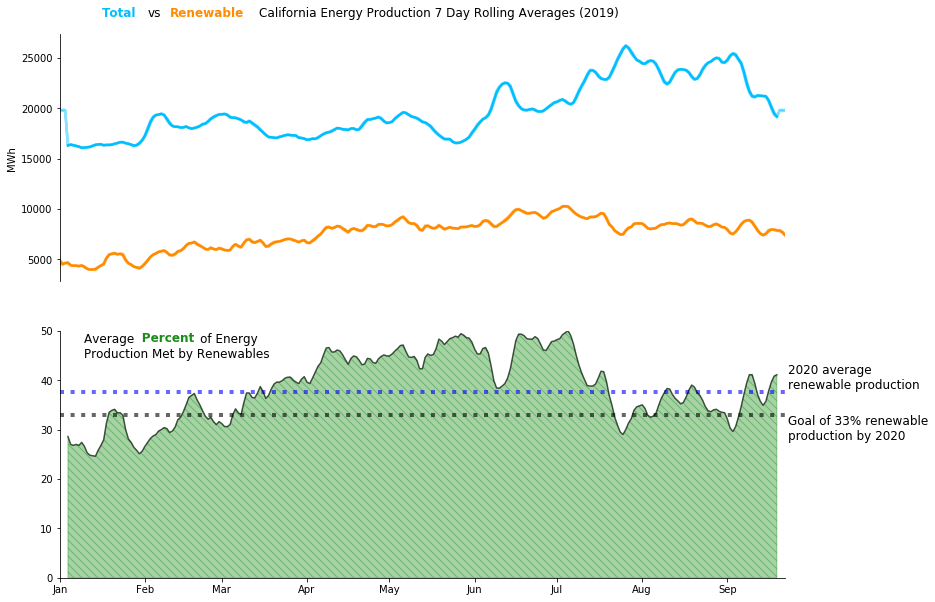

In [24]:

months = mdates.MonthLocator()

testd = prod_df.loc[(prod_df['timestamp'].dt.year > 2018)&(prod_df['timestamp'] < pd.to_datetime('2019-09-23')) ,['timestamp','TOTAL PRODUCTION']]
testd1 = testd.set_index(pd.DatetimeIndex(testd['timestamp']))
testd1.drop(columns=['timestamp'],inplace=True)
seasond = testd1.rolling(window=7*24, center=True).mean().groupby(testd1.index.dayofyear).mean()
q25d = testd1.rolling(window=7*24, center=True).mean().groupby(testd1.index.dayofyear).quantile(.25)

q25d['TOTAL PRODUCTION'] = q25d['TOTAL PRODUCTION'].fillna(q25d['TOTAL PRODUCTION'].mean())
q75d = testd1.rolling(window=7*24, center=True).mean().groupby(testd1.index.dayofyear).quantile(.75)
q75d['TOTAL PRODUCTION'] = q75d['TOTAL PRODUCTION'].fillna(q75d['TOTAL PRODUCTION'].mean())


f, axes = plt.subplots(nrows=2, figsize=(13,10), sharey=False)
ax = axes[0]
ax.fill_between(seasond.index,q25d.values.ravel(),q75d.values.ravel(),color='#00BFFF',hatch='\\\\\\', 
                alpha=0.45, label='Inter Quartile Range (Demand)',lw=2.5)
seasond.plot(ax=ax, color='#00BFFF',lw=2.5)

test = prod_df.loc[(prod_df['timestamp'].dt.year > 2018)&(prod_df['timestamp'] < pd.to_datetime('2019-09-23')),['timestamp','RENEWABLES']]
test1 = test.set_index(pd.DatetimeIndex(test['timestamp']))
test1.drop(columns=['timestamp'],inplace=True)
season = test1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).mean()
q25 = test1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.25)
q75 = test1.rolling(window=7*24, center=True, min_periods=20).mean().groupby(test1.index.dayofyear).quantile(.75)

ax.fill_between(season.index,q25.values.ravel(),q75.values.ravel(),color='#FF8C00',hatch='\\\\\\', alpha=0.45, 
                label='Inter Quartile Range (Production)',lw=2.5)
season.plot(ax=ax, color='#FF8C00',lw=2.5)



month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
ax.set_xlabel('')
# ax.xaxis.set_major_locator(months)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_ylabel('MWh')


# for i in ax.get_xticks():
# #    ax.annotate('{}%'.format(p),(i,10000),ha='left',color='k',clip_on=True)
#     ax.axvline(i, ls=':',color='0.8',zorder=-1)

    
    
plt.figtext(0.17, 0.9, "Total", ha="left", va="bottom", size="large",color='#00BFFF', weight='bold')
plt.figtext(0.219, 0.9, "vs", ha="left", va="bottom", size="large")
plt.figtext(0.243,0.9,"Renewable", ha="left", va="bottom", size="large",color='#FF8C00', weight='bold')
plt.figtext(0.338,0.9,"California Energy Production 7 Day Rolling Averages (2019)",ha="left", va="bottom", size="large")

ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax.get_legend().remove()

ax = axes[1]

days = season.index.values

demand = seasond['TOTAL PRODUCTION'].values
prod = season['RENEWABLES'].values
percentages = [round((prod[i-1]/demand[i-1])*100,1) for i in days]
df = pd.DataFrame({
    'date':days,
    'percent':percentages
})

df = df.set_index('date')
ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

df.plot(ax=ax,color='k',alpha=.6,ls='-')
ax.fill_between(season.index,percentages,0,color='g',hatch='\\\\\\', alpha=0.35)
months = mdates.MonthLocator()
ax.set_xlabel('')
ax.xaxis.set_major_locator(months)

ax.set_xticklabels(month_names)

# for i in range(5,61,5):
#     ax.axhline(i, ls=':',color='0.6',zorder=-1)
    
ax.axhline(33,ls=':',color='k',alpha=.6,zorder=1,lw=4)
avg = np.average(np.nan_to_num(percentages))

ax.axhline(avg,ls=':',color='b',alpha=.6,zorder=1,lw=4)
    
ax.text(10, 44, "Average                 of Energy \nProduction Met by Renewables", ha="left", va="bottom", size="large")
ax.text(10, 47.2, "              Percent", ha="left", va="bottom", size="large",color='g',fontweight='bold',alpha=.9)
# ax.text(23, 52, "Average Percent Of Energy Production Met by Renewables", ha="left", va="bottom", size="large")

ax.text(266,33,'Goal of 33% renewable\nproduction by 2020',ha='left',size='large',va='top')
ax.text(266,avg,'2020 average \nrenewable production',ha='left',size='large',va='bottom')
ax.get_legend().remove()
ax.set_ylim(bottom=0,top=50)
plt.show()